In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import requests, zipfile, io, os

Notes:
- need geopandas
- need shape files: 
 - get shape files from census bureau (for US, probably has others)
 - depending on what you are doing, there's different files
 - out of the box, might not have, so may need to do some work
- plot it using sytax below.
- need to modify file.  for example, in my case, I had to remove non-lower 48 states to make the plot I wanted

## Get Shape Files

In [2]:
## Create directory to download into
cwd = os.getcwd()
new_dir = os.path.join(cwd, r'ShapeFolder')

##Path
zip_file_url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_5m.zip'
fn = new_dir+'/cb_2018_us_state_5m.shp'

In [3]:
## Create dir and download
if not os.path.exists(fn):
    if not os.path.exists(new_dir):
        print('Creating directory')
        os.makedirs(new_dir)

    print('Downloading Files')
    r = requests.get(zip_file_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(new_dir)

## Create Map

In [4]:
states = gpd.read_file(fn)
states_remove = ['HI', 'VI', 'DC', 'GU', 'MP', 'AS', 'PR', 'AK']
states = states[~states['STUSPS'].isin(states_remove)]

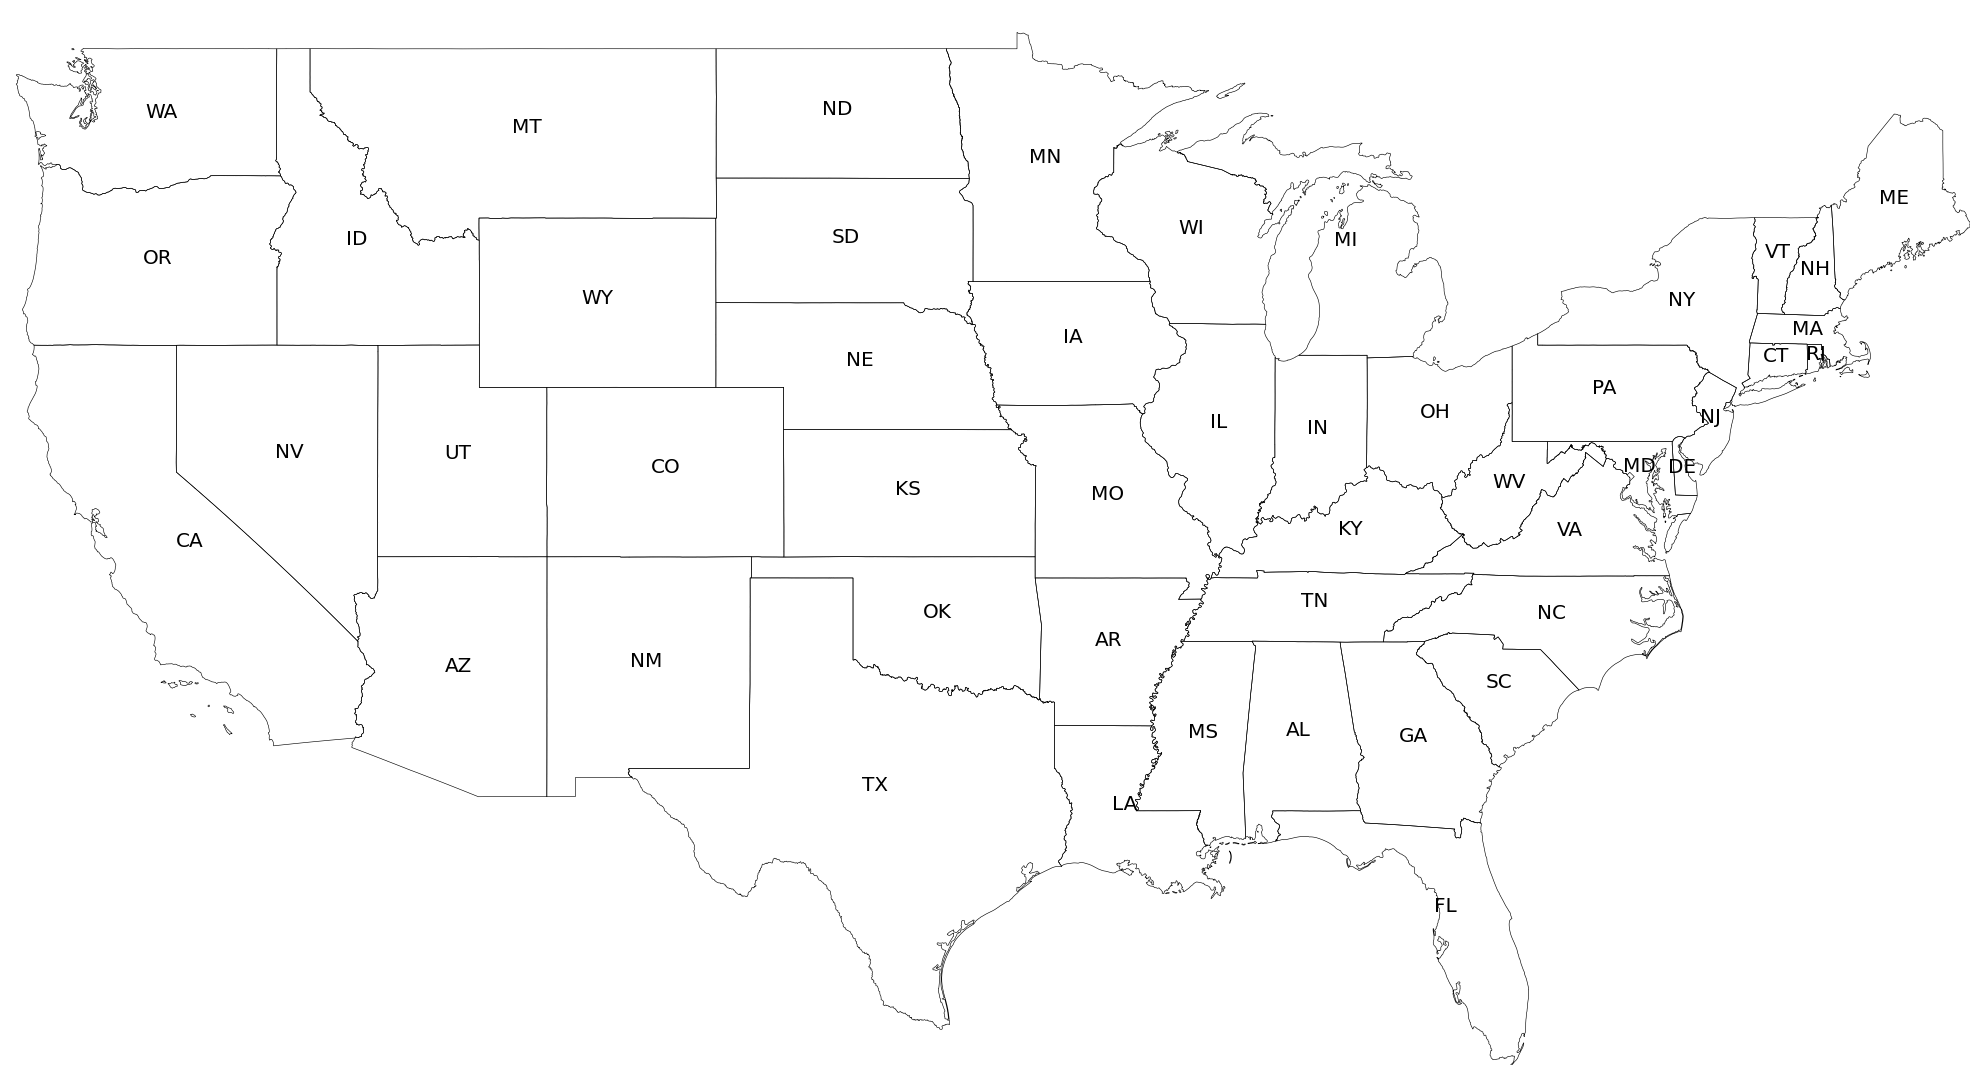

In [8]:
fig = plt.figure(1, figsize=(30,15)) 
ax = fig.add_subplot()

states.boundary.plot(ax=ax, color='Black', linewidth=.6)
states.apply(lambda x: ax.annotate(text=x.STUSPS, 
                                   xy=x.geometry.centroid.coords[0], 
                                   ha='center', 
                                   fontsize=20),
             axis=1)

#zoom in on lower 48 by trial and error
ax.set_xlim(-125,-67)
ax.set_ylim(25, 50)

#final touches
plt.axis('off')
plt.tight_layout()

fig.savefig('US_Map.png', facecolor='w')